In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('all.csv')

choc = df[df['product'] == 'CHOCOLATE']['mid_price']
strawb = df[df['product'] == 'STRAWBERRIES']['mid_price']
roses = df[df['product'] == 'ROSES']['mid_price']
basket = df[df['product'] == 'GIFT_BASKET']['mid_price']


combined = 6 * strawb + 4 * choc + roses

choc = choc.to_list()
strawb = strawb.to_list()
roses = roses.to_list()
basket = basket.to_list()

lis = [strawb[i]*6 + choc[i]*4 + roses[i] for i in range(len(strawb))]


# create new dataframe
df2 = pd.DataFrame()
df2['combined'] = lis
df2['combined'] = df2['combined'] + 380
df2['basket'] = basket


0.5095166666666666 76.42310842343251


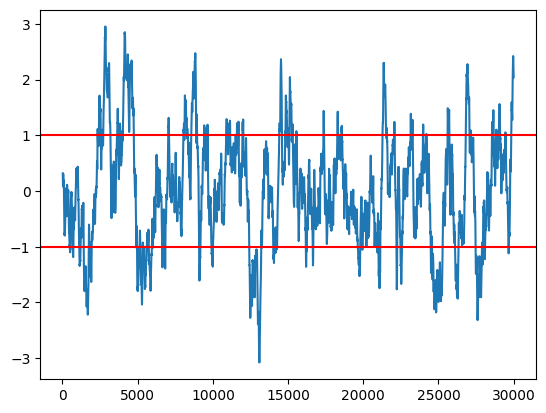

In [25]:
spread = df2['combined'] - df2['basket']
sd = np.std(spread)
mean = np.mean(spread)
zscores = (spread - mean) / sd

print(mean, sd)

# histogram
# plt.hist(df2['zscores'], bins=10)
# plt.xlabel('Z-Score')
# plt.ylabel('Frequency')

zscores.rolling(window=20).mean().plot()
plt.axhline(y=1, color='r', linestyle='-')
plt.axhline(y=-1, color='r', linestyle='-')

[153, 462, 468, 492, 495, 497, 504, 508, 514, 519, 666, 672, 673, 681, 693, 695, 704, 709, 710, 713, 715, 1110, 1111, 1117, 1118, 1121, 1124, 1140, 1146, 1148, 1158, 1166, 1167, 1168, 1172, 1180, 1184, 1188, 1201, 1204, 1400, 1405, 1408, 1412, 1418, 1422, 1432, 1440, 1444, 1450, 1455, 1457, 1460, 1463, 1466, 1468, 1469, 1473, 1477, 1480, 1491, 1496, 1501, 1511, 1513, 1519, 1521, 1523, 1525, 1526, 1532, 1540, 1542, 1543, 1548, 1550, 1551, 1555, 1560, 1567, 1573, 1577, 1584, 1585, 1586, 1597, 1602, 1603, 1609, 1615, 1616, 1622, 1625, 1626, 1630, 1631, 1634, 1635, 1637, 1638, 1639, 1640, 1643, 1646, 1662, 1667, 1674, 1675, 1676, 1677, 1679, 1682, 1691, 1692, 1706, 1711, 1717, 1718, 1719, 1723, 1727, 1731, 1773, 1774, 1780, 1781, 1789, 1794, 1799, 1807, 1823, 1828, 1829, 1832, 1838, 1839, 1841, 1842, 1849, 1855, 1856, 1858, 1860, 1861, 1866, 1867, 1870, 1871, 1874, 1888, 1889, 1896, 1899, 1903, 1907, 1918, 2320, 2328, 2331, 2333, 2349, 2365, 2371, 2406, 2408, 2416, 2423, 2428, 2440, 2441, 

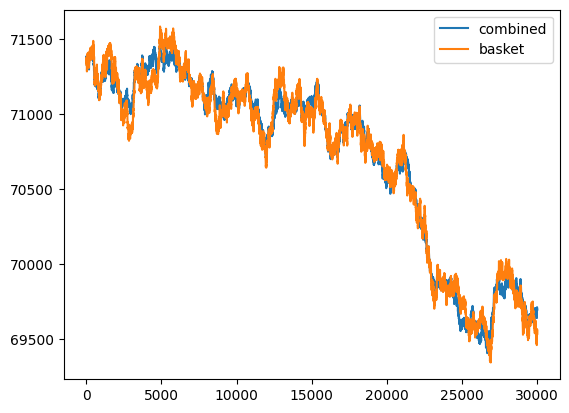

In [26]:
df2.plot()
times = []

for i in range(101, len(df2)):
    dc = df2['combined'][i] - df2['combined'][i-1]
    db = df2['basket'][i] - df2['basket'][i-1]
    if dc == 0 or db == 0:
        continue
    dc /= abs(dc)
    db /= abs(db)
    if dc == -db and abs(zscores[i]) > 1:
        times.append(i)
        continue

print(times)